# Diabetes Analysis


In [59]:
import pandas as pd
from plotting import plot_comparatives
from utils import extract_parameters, sort_dataframe_by
ranking_size = 10
database = 'Diabetes'
cv = 5
extension = f'{database}_cv_{cv}.csv'
df_nn = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/neural_network_classification_{extension}')
df_nystrom_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/Nystrom_and_ridge_classification_{extension}')
df_rbf_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/RBF_and_ridge_classification_{extension}')
df_nystrom_and_svm = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/Nystrom_and_svm_classification_{extension}')
file_path_for_ksvm = f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/KSVM_classification_{database}_cv_{cv}.txt'
file_path_for_kernel_ridge_classification = f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/kernel_ridge_classification_{database}_cv_{cv}.txt'


df_with_n_components = [df_nystrom_and_ridge, df_rbf_and_ridge, df_nystrom_and_svm]
df_labels = ['Nyström and ridge classification', 'RFF and ridge classification', 'Nystrom and svm classification']

damping_formula = lambda accuracy, time : accuracy / time *100
damping_column = 'damping'
for df in df_with_n_components:
    df['damping'] = damping_formula(df.accuracy_test,df.training_time)


In [60]:
# get KSVM data
best_params_ksvm, training_time_ksvm, test_accuracy_ksvm = extract_parameters(file_path_for_ksvm)
best_params_krc, training_time_krc, test_accuracy_krc = extract_parameters(file_path_for_kernel_ridge_classification)

damping_ksvm = damping_formula(float(test_accuracy_ksvm),float(training_time_ksvm))
damping_krc = damping_formula(float(test_accuracy_krc),float(training_time_krc))

constant_values = {
    'model': ['KSVM', 'Kernel ridge classification'],
    "training_time" : [training_time_ksvm, training_time_krc],
    'accuracy_test' : [test_accuracy_ksvm, test_accuracy_krc],
    'damping': [damping_ksvm, damping_krc],
    'best_params' : [best_params_ksvm, best_params_krc]
}
df_basic_models = pd.DataFrame(constant_values)

df_basic_models

,model,training_time,accuracy_test,damping,best_params
0,KSVM,0.003765,0.774892,20582.177639,"{'svm__C': 316.22776601683796, 'svm__gamma': 0..."
1,Kernel ridge classification,0.274412,0.744589,271.339799,"{'ridge_classification__alpha': 0.0001, 'ridge..."


In [61]:
# Concatenate the data frames while adding the model information
df_results = pd.concat([
    df_nystrom_and_ridge.assign(model="nystrom_and_ridge of n_comp. "+df_nystrom_and_ridge["n_components"].astype(str)),
    df_rbf_and_ridge.assign(model="rbf_and_ridge of n_comp. "+df_rbf_and_ridge["n_components"].astype(str)),
    df_nystrom_and_svm.assign(model="nystrom_and_svm of n_comp. "+df_rbf_and_ridge["n_components"].astype(str)),
    df_basic_models
], ignore_index=True)



# Reorder the columns as per your requirement
df_results = df_results[["model", "training_time", "accuracy_test", "damping", "best_params"]]

# Print the unified data frame
df_results

,model,training_time,accuracy_test,damping,best_params
0,nystrom_and_ridge of n_comp. 10,0.004519,0.735931,16286.166989,"{'nystroem__gamma': 0.015625, 'ridge_classific..."
1,nystrom_and_ridge of n_comp. 20,0.001810,0.748918,41374.983008,"{'nystroem__gamma': 0.015625, 'ridge_classific..."
2,nystrom_and_ridge of n_comp. 50,0.240117,0.766234,319.108724,"{'nystroem__gamma': 0.0013810679320049757, 'ri..."
3,nystrom_and_ridge of n_comp. 100,0.537522,0.744589,138.522510,"{'nystroem__gamma': 0.015625, 'ridge_classific..."
4,nystrom_and_ridge of n_comp. 200,0.531934,0.757576,142.419121,"{'nystroem__gamma': 0.015625, 'ridge_classific..."
5,rbf_and_ridge of n_comp. 10,0.002029,0.735931,36267.386082,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."
6,rbf_and_ridge of n_comp. 20,0.001516,0.761905,50254.131003,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
7,rbf_and_ridge of n_comp. 50,0.001797,0.740260,41195.096054,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."
8,rbf_and_ridge of n_comp. 100,0.074780,0.753247,1007.283874,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."
9,rbf_and_ridge of n_comp. 200,0.193818,0.744589,384.168854,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."


# Damping 


In [62]:
column_name = 'damping'
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=False, ranking_size=ranking_size)

Sort by  damping


,model,training_time,accuracy_test,damping,best_params
6,rbf_and_ridge of n_comp. 20,0.001516,0.761905,50254.131003,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
1,nystrom_and_ridge of n_comp. 20,0.001810,0.748918,41374.983008,"{'nystroem__gamma': 0.015625, 'ridge_classific..."
7,rbf_and_ridge of n_comp. 50,0.001797,0.740260,41195.096054,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."
5,rbf_and_ridge of n_comp. 10,0.002029,0.735931,36267.386082,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."
17,KSVM,0.003765,0.774892,20582.177639,"{'svm__C': 316.22776601683796, 'svm__gamma': 0..."
0,nystrom_and_ridge of n_comp. 10,0.004519,0.735931,16286.166989,"{'nystroem__gamma': 0.015625, 'ridge_classific..."
12,nystrom_and_svm of n_comp. 10,0.006022,0.761905,12652.071385,"{'nystroem__gamma': 0.0001220703125, 'svm__C':..."
13,nystrom_and_svm of n_comp. 20,0.006523,0.757576,11614.105158,"{'nystroem__gamma': 0.015625, 'svm__C': 100.0}"
14,nystrom_and_svm of n_comp. 50,0.072590,0.761905,1049.598539,"{'nystroem__gamma': 0.0001220703125, 'svm__C':..."
8,rbf_and_ridge of n_comp. 100,0.074780,0.753247,1007.283874,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."


## Accuracy on test

In [63]:
column_name = "accuracy_test"
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=False, ranking_size=ranking_size)

Sort by  accuracy_test


,model,training_time,accuracy_test,damping,best_params
17,KSVM,0.003765,0.774892,20582.177639,"{'svm__C': 316.22776601683796, 'svm__gamma': 0..."
2,nystrom_and_ridge of n_comp. 50,0.240117,0.766234,319.108724,"{'nystroem__gamma': 0.0013810679320049757, 'ri..."
14,nystrom_and_svm of n_comp. 50,0.072590,0.761905,1049.598539,"{'nystroem__gamma': 0.0001220703125, 'svm__C':..."
16,nystrom_and_svm of n_comp. 200,0.171505,0.761905,444.246451,"{'nystroem__gamma': 0.0001220703125, 'svm__C':..."
6,rbf_and_ridge of n_comp. 20,0.001516,0.761905,50254.131003,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
15,nystrom_and_svm of n_comp. 100,0.109475,0.761905,695.962983,"{'nystroem__gamma': 0.0001220703125, 'svm__C':..."
12,nystrom_and_svm of n_comp. 10,0.006022,0.761905,12652.071385,"{'nystroem__gamma': 0.0001220703125, 'svm__C':..."
4,nystrom_and_ridge of n_comp. 200,0.531934,0.757576,142.419121,"{'nystroem__gamma': 0.015625, 'ridge_classific..."
13,nystrom_and_svm of n_comp. 20,0.006523,0.757576,11614.105158,"{'nystroem__gamma': 0.015625, 'svm__C': 100.0}"
8,rbf_and_ridge of n_comp. 100,0.074780,0.753247,1007.283874,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."


# Ranking by time

In [64]:
column_name = "training_time"
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=True, ranking_size=ranking_size)

Sort by  training_time


,model,training_time,accuracy_test,damping,best_params
6,rbf_and_ridge of n_comp. 20,0.001516,0.761905,50254.131003,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
7,rbf_and_ridge of n_comp. 50,0.001797,0.740260,41195.096054,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."
1,nystrom_and_ridge of n_comp. 20,0.001810,0.748918,41374.983008,"{'nystroem__gamma': 0.015625, 'ridge_classific..."
5,rbf_and_ridge of n_comp. 10,0.002029,0.735931,36267.386082,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."
17,KSVM,0.003765,0.774892,20582.177639,"{'svm__C': 316.22776601683796, 'svm__gamma': 0..."
0,nystrom_and_ridge of n_comp. 10,0.004519,0.735931,16286.166989,"{'nystroem__gamma': 0.015625, 'ridge_classific..."
12,nystrom_and_svm of n_comp. 10,0.006022,0.761905,12652.071385,"{'nystroem__gamma': 0.0001220703125, 'svm__C':..."
13,nystrom_and_svm of n_comp. 20,0.006523,0.757576,11614.105158,"{'nystroem__gamma': 0.015625, 'svm__C': 100.0}"
14,nystrom_and_svm of n_comp. 50,0.072590,0.761905,1049.598539,"{'nystroem__gamma': 0.0001220703125, 'svm__C':..."
8,rbf_and_ridge of n_comp. 100,0.074780,0.753247,1007.283874,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."


# Plotting 


Analysis of training_time


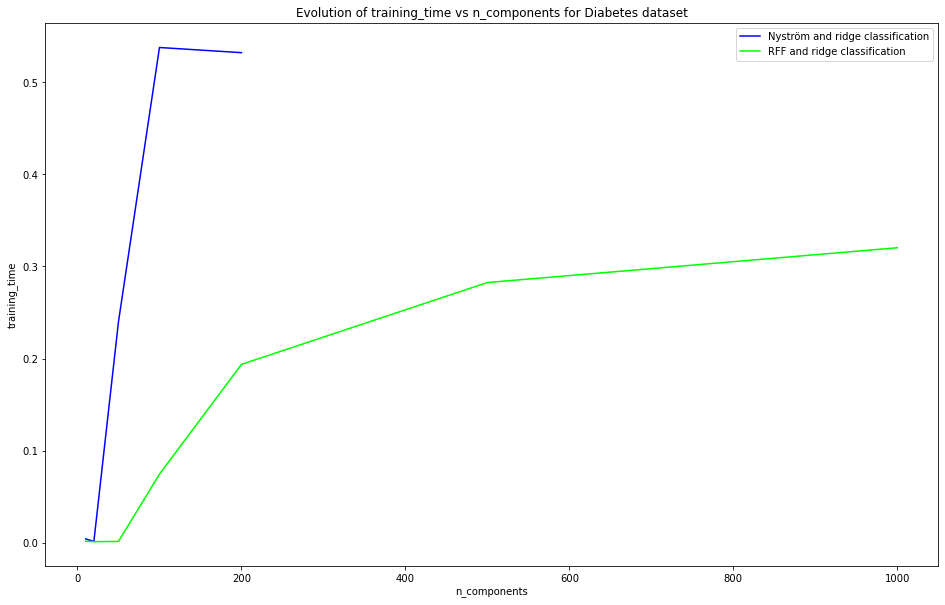

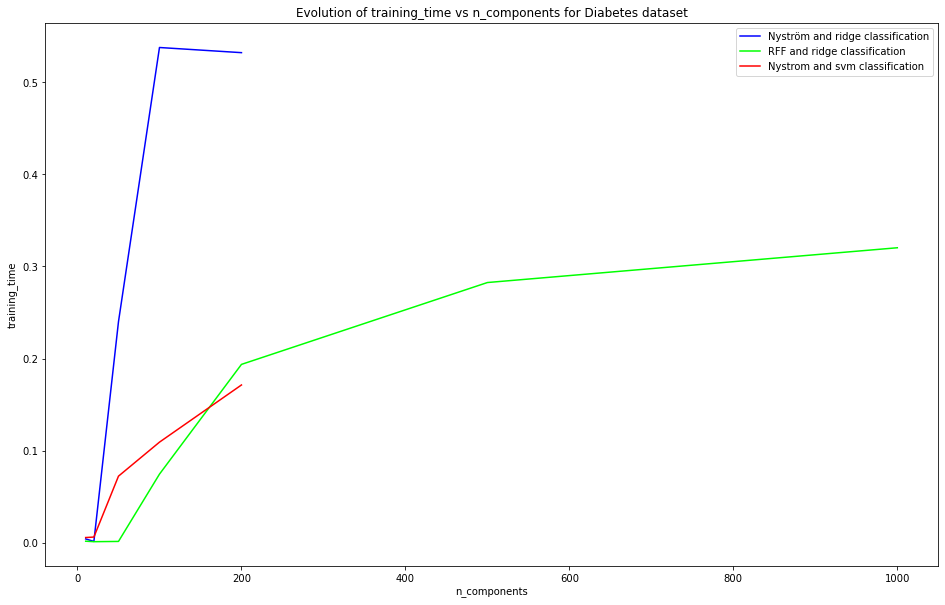

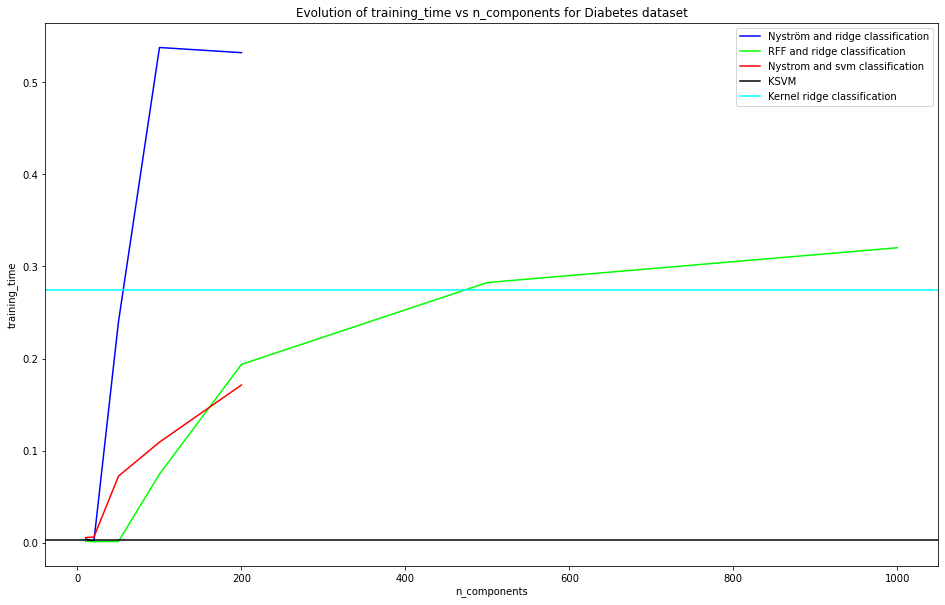

Analysis of accuracy_test


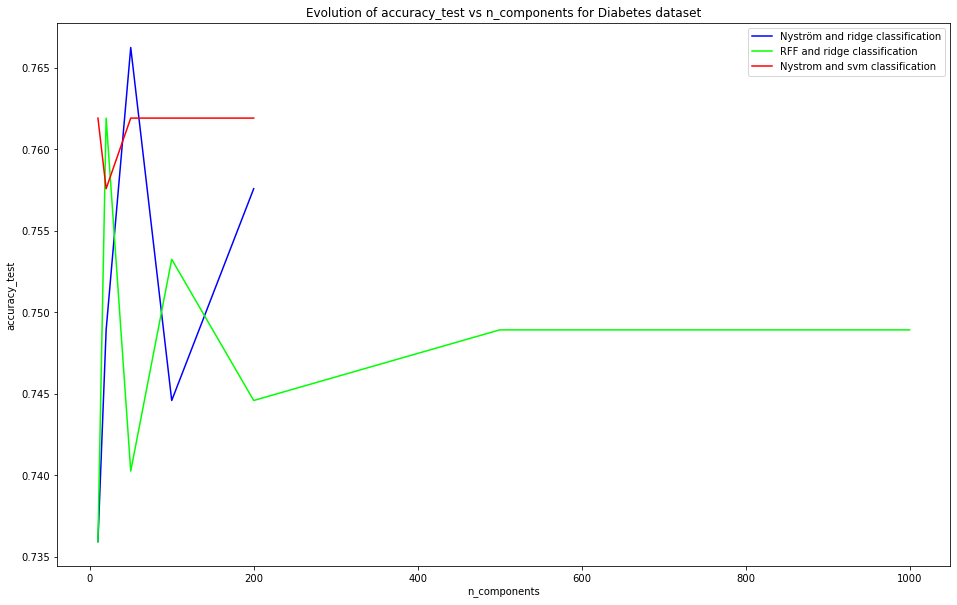

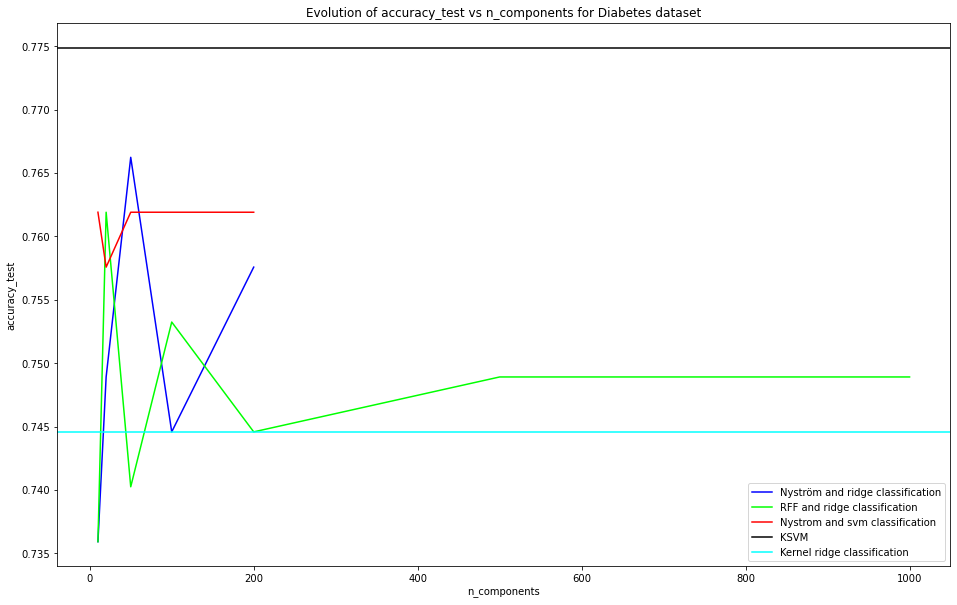

Analysis of damping


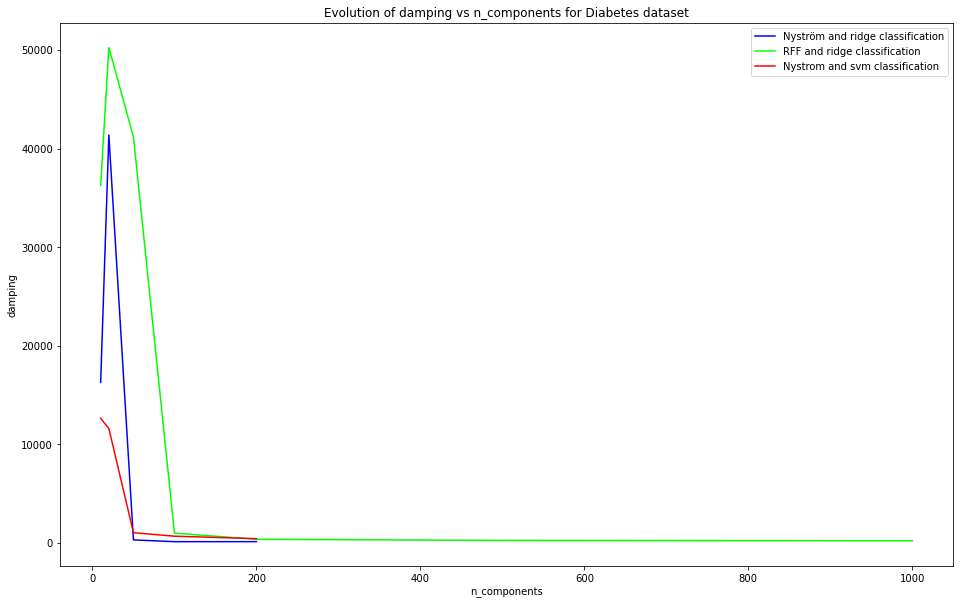

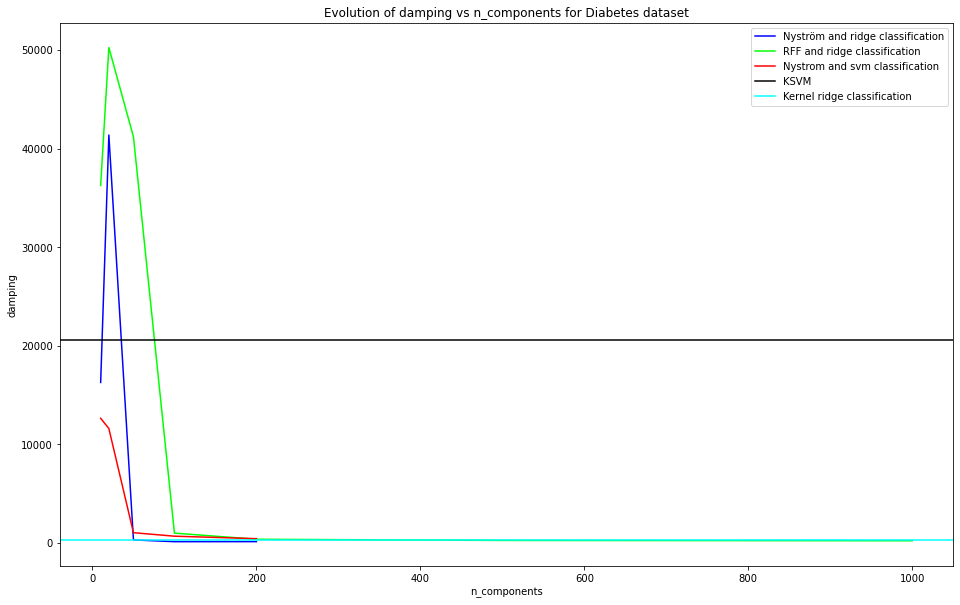

In [65]:

for column in ['training_time', 'accuracy_test', 'damping']:
    title = f'Evolution of {column} vs n_components for {database} dataset'
    print(f'Analysis of {column}')
    if column == 'training_time':
        plot_comparatives(column=column, df_with_n_components=df_with_n_components[:-1], df_labels=df_labels[:-1], title=title)
    plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
    plot_comparatives(column, df_with_n_components, df_labels, title, df_basic_models[column], df_basic_models['model'] , False)



In [66]:
nn_accuracy = df_nn.accuracy_test.to_list()
nn_training_time = df_nn.training_time.to_list()
nn_labels = list(map(lambda x: 'NN of shape '+str(x),df_nn.hidden_layer_sizes.to_list()))
df_nn.head()



,hidden_layer_sizes,best_params,best_accuracy_cv,training_time,accuracy_test,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp_classification__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,"(644,)",{'mlp_classification__alpha': 0.0001},0.744964,0.145002,0.800866,[0.05730391 0.06016841 0.06931195 0.07400002 0...,[0.01335346 0.0116575 0.01146526 0.01863419 0...,[0.00052781 0.00074496 0.00052381 0.00075841 0...,[5.72408004e-05 4.55736939e-04 2.72411355e-05 ...,[1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 10...,"[{'mlp_classification__alpha': 1e-06}, {'mlp_c...",[0.75925926 0.69444444 0.73148148 0.72222222 0...,[0.69444444 0.71296296 0.71296296 0.72222222 0...,[0.73831776 0.71962617 0.78504673 0.74766355 0...,[0.68224299 0.6635514 0.73831776 0.72897196 0...,[0.73831776 0.73831776 0.75700935 0.71962617 0...,[0.72251644 0.70578055 0.74496366 0.72814123 0...,[0.02918693 0.02535258 0.02450197 0.01024096 0...,[ 5 7 1 3 4 5 2 8 9 11 10 14 13 12]
1,"(25, 25)",{'mlp_classification__alpha': 0.0001},0.720699,0.017517,0.761905,[0.02845259 0.03450799 0.02883949 0.03834891 0...,[0.0132302 0.01781592 0.00874012 0.02485809 0...,[0.00032277 0.00061588 0.0003335 0.00032387 0...,[9.71905961e-06 5.94483853e-04 4.60073485e-05 ...,[1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 10...,"[{'mlp_classification__alpha': 1e-06}, {'mlp_c...",[0.60185185 0.69444444 0.7037037 0.66666667 0...,[0.67592593 0.71296296 0.72222222 0.73148148 0...,[0.73831776 0.70093458 0.77570093 0.72897196 0...,[0.3364486 0.72897196 0.71028037 0.70093458 0...,[0.76635514 0.63551402 0.69158879 0.71962617 0...,[0.62377985 0.69456559 0.7206992 0.70953617 0...,[0.15440592 0.03178027 0.02923123 0.02397055 0...,[ 8 5 1 3 6 2 4 7 10 9 14 13 11 12]
2,"(8, 8, 8)",{'mlp_classification__alpha': 0.0001},0.657529,0.020356,0.740260,[0.01672211 0.0125391 0.02590413 0.01419067 0...,[0.00446239 0.00678709 0.02162426 0.00640786 0...,[0.00029864 0.00029001 0.0002914 0.00039315 0...,[7.55542421e-06 1.33502483e-05 1.81470215e-05 ...,[1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 10...,"[{'mlp_classification__alpha': 1e-06}, {'mlp_c...",[0.71296296 0.62037037 0.60185185 0.62037037 0...,[0.64814815 0.59259259 0.62037037 0.37962963 0...,[0.43925234 0.37383178 0.80373832 0.62616822 0...,[0.59813084 0.62616822 0.61682243 0.6728972 0...,[0.6635514 0.6635514 0.64485981 0.61682243 0...,[0.61240914 0.57530287 0.65752856 0.58317757 0...,[0.09401173 0.10324311 0.07439813 0.10377365 0...,[ 2 6 1 5 7 4 9 3 10 11 13 8 12 14]


In [67]:
nn_accuracy,nn_training_time,nn_labels

([0.8008658008658008, 0.7619047619047619, 0.7402597402597403],
 [0.1450021266937255, 0.01751708984375, 0.0203561782836914],
 ['NN of shape (644,)', 'NN of shape (25, 25)', 'NN of shape (8, 8, 8)'])

In [68]:
from plotting import plot_comparatives

# Time analysis adults data set

Conclusion: Radom features win. 

Use Wilcolxon .

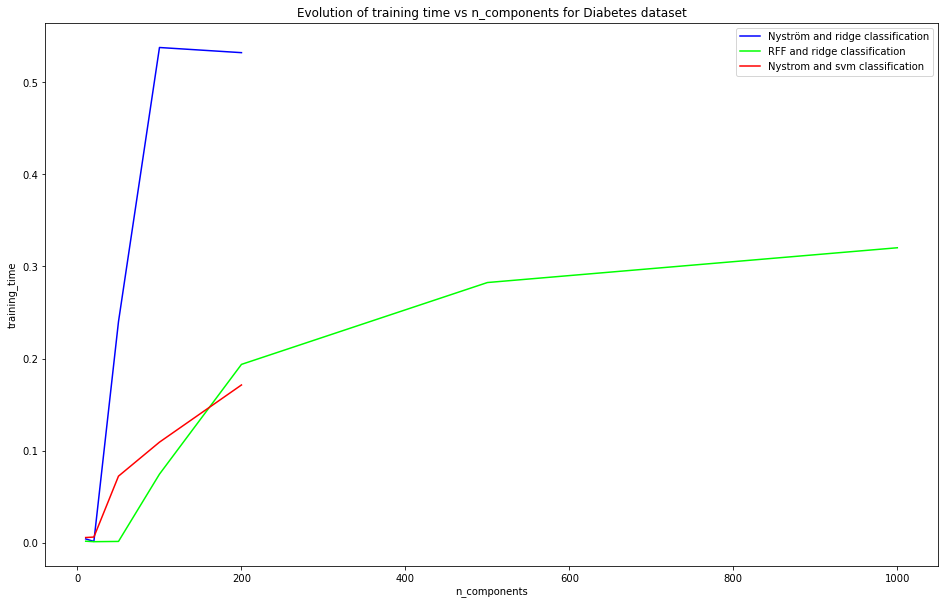

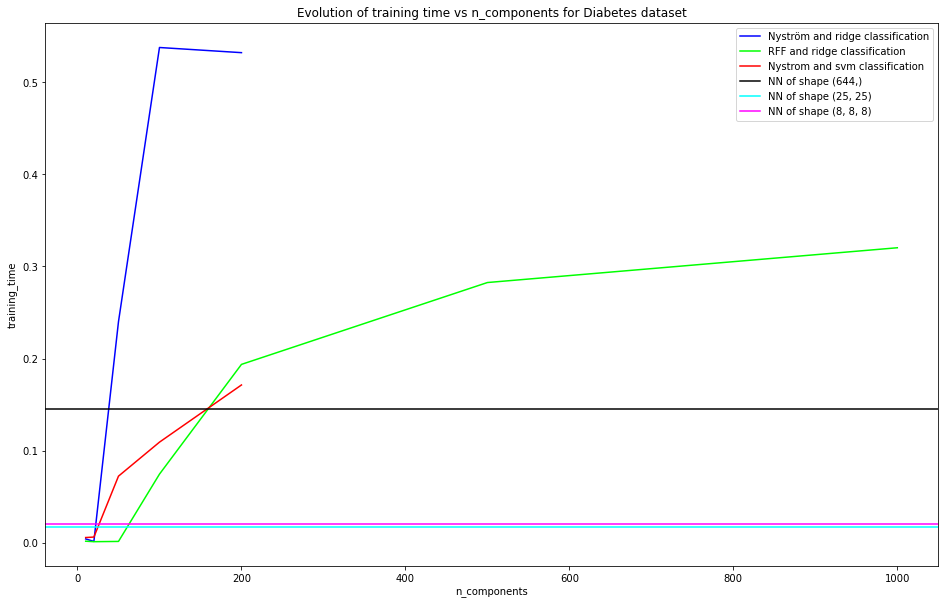

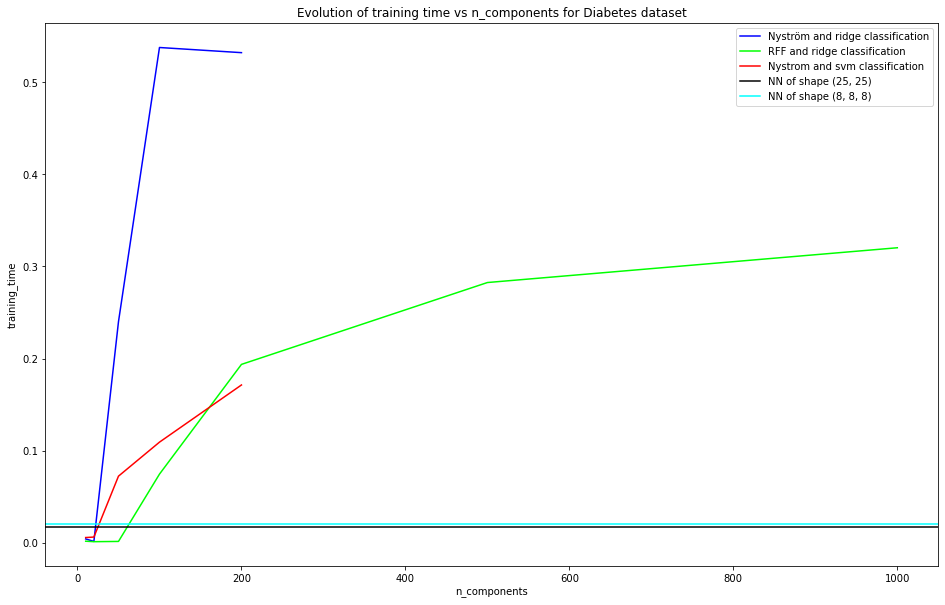

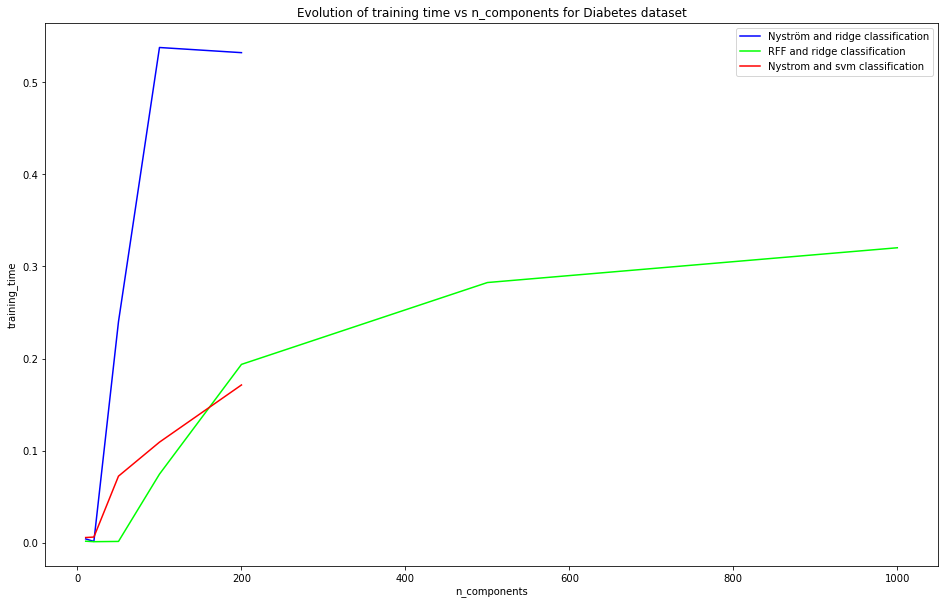

In [69]:

column = 'training_time'
title = f'Evolution of training time vs n_components for {database} dataset'

plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[2:-1], nn_labels[2:-1], False)

# TODO separate
# rm nn and add svc linear
# ksvm 
# rr Nystrom + rfb linear 
# usar intelet

# Accuracy 

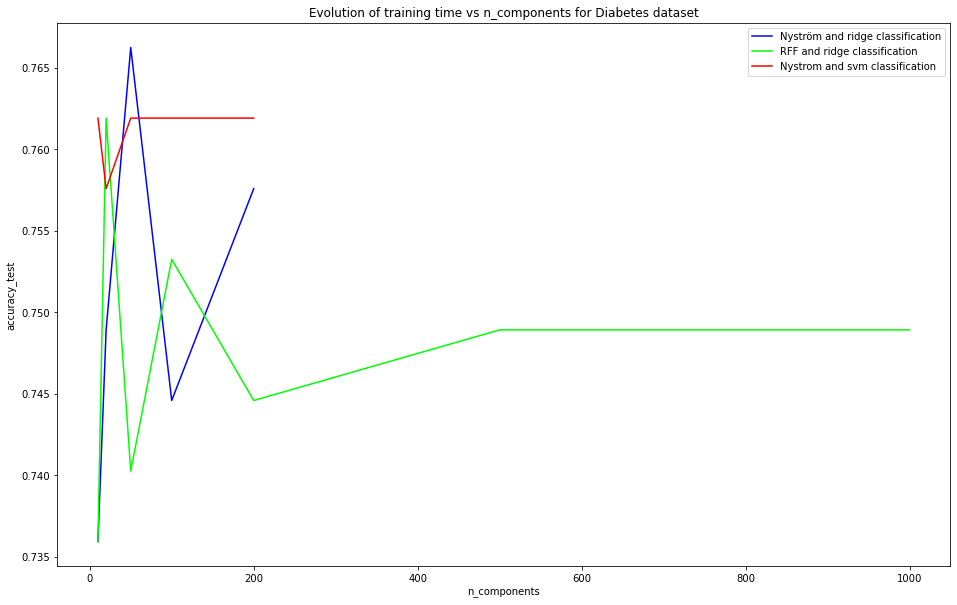

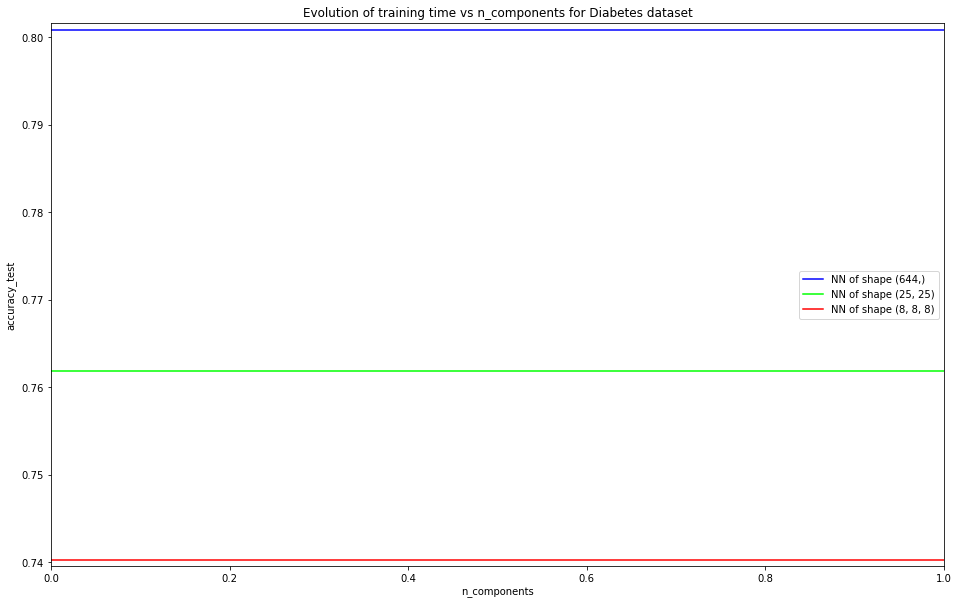

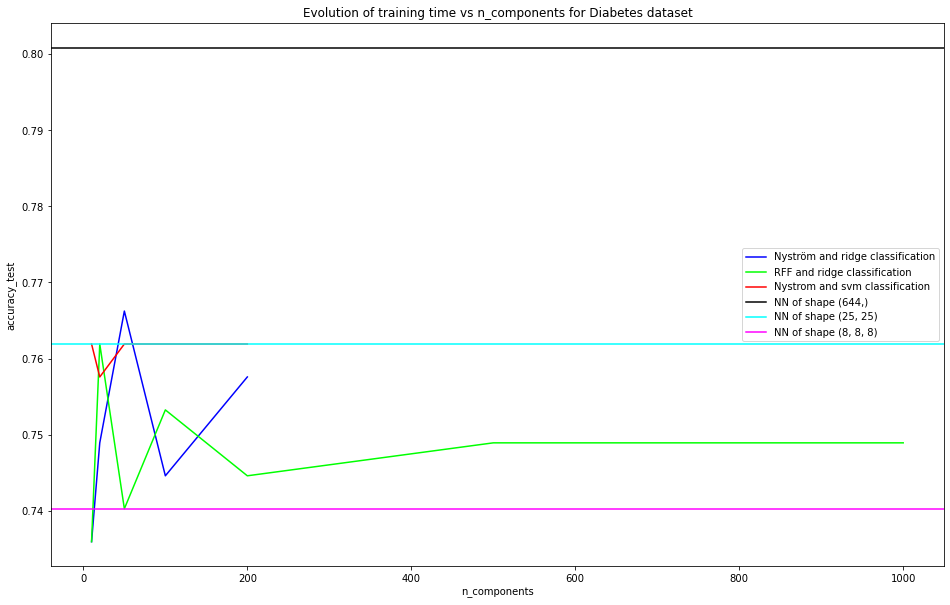

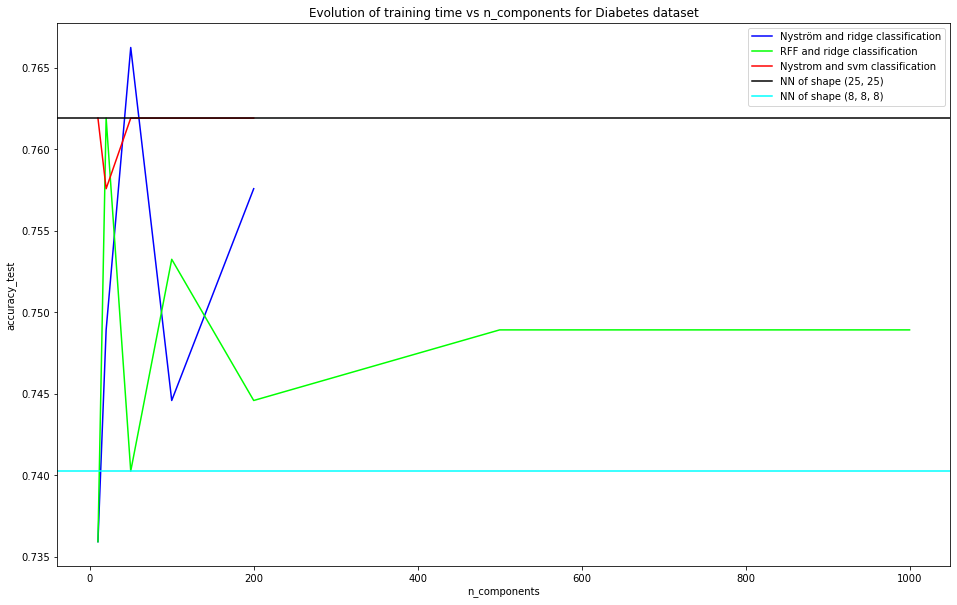

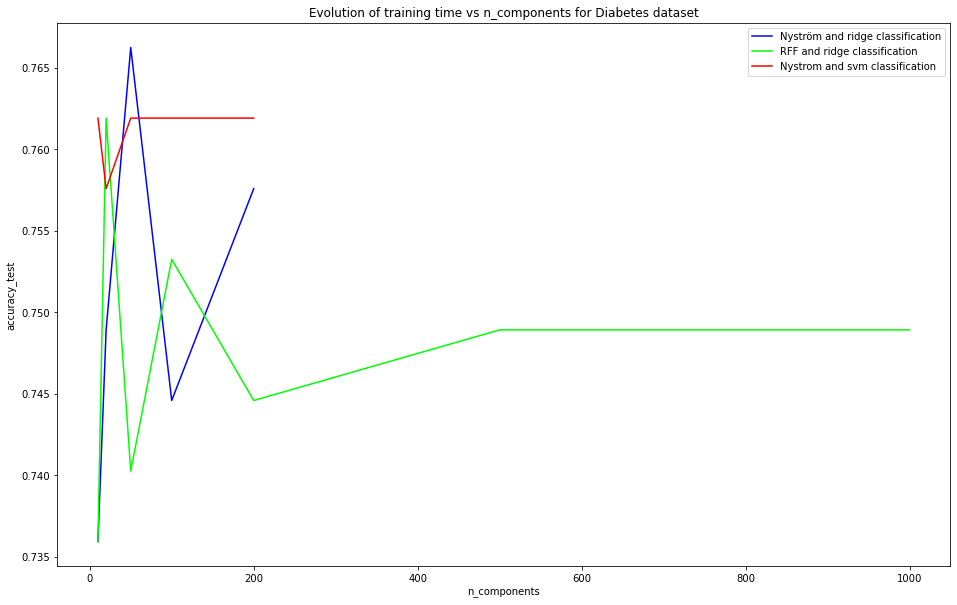

In [70]:
column = 'accuracy_test'

#df_labels = ['Nyström and ridge regression', 'RFF and ridge regression']
#title = 'Evolution of accuracy vs n_components for a9a dataset'
constant_data = nn_accuracy
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[2:-1], nn_labels[2:-1], False)


# Damping


Formula: 

$$damping = \frac{accuracy}{time} \times 100$$

The bigger the best

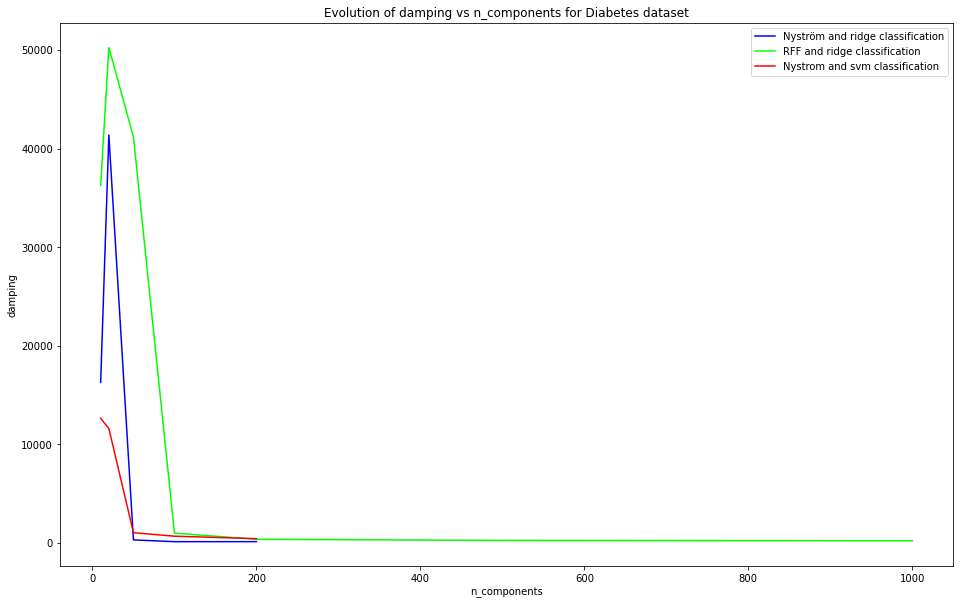

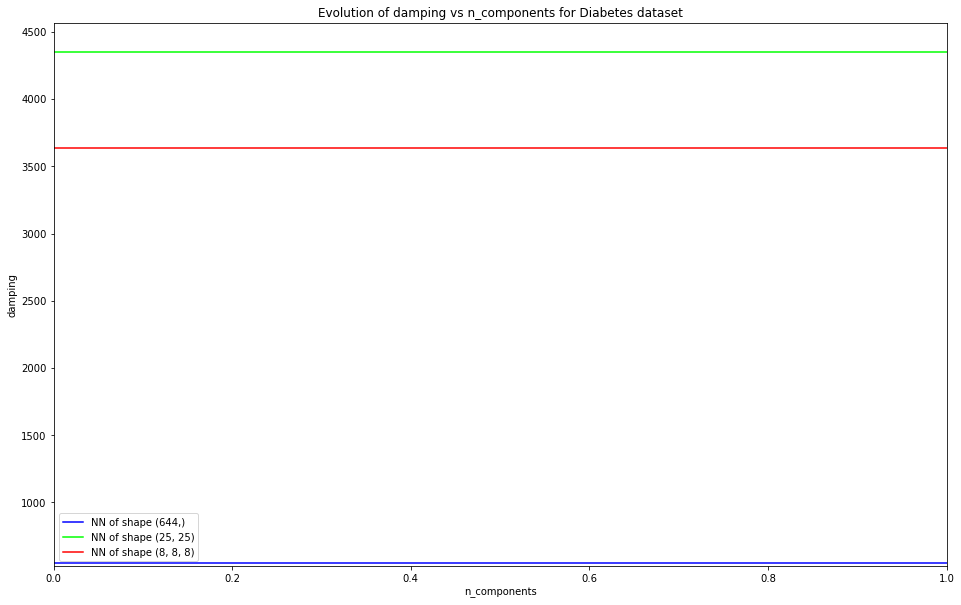

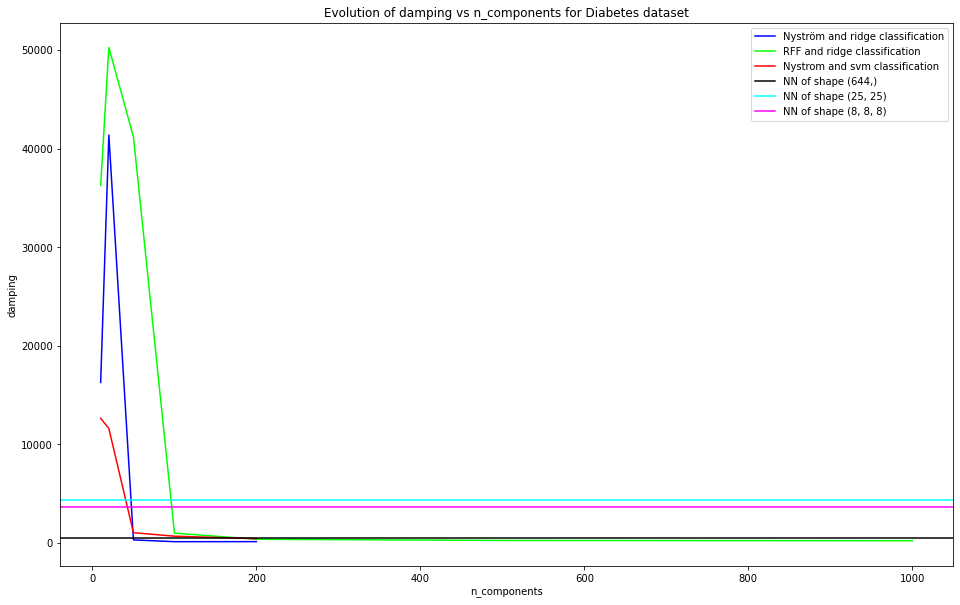

In [71]:
# Computing damping
constant_damping = [acc / time*100 for acc,time in zip(nn_accuracy, nn_training_time)]

# Plotting

column = damping_column
title = f'Evolution of damping vs n_components for {database} dataset'
constant_data = constant_damping
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False, constant_margin=0.05)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)